## Final Project Submission

* Student name: Simran Kaur
* Student pace: Self paced - 60 weeks
* Scheduled project review date/time: 
* Instructor name: Claude Fried
* Blog post URL:

# Microsoft x Hollywood

![title](Images/logo.png)

Author: Simran Kaur

### Overview

This project is to assist Microsoft produce movies. Microsoft is starting from scratch as they have no previous movie production experience. A few different analyses were performed. The first analysis was done on release date and the best time in the year to release a movie. A second analysis was done on genres, to determine which genres would be the most profitable for them to start off with. Lastly, a third analysis was done on movie runtimes, to see which runtime would be the most ideal. Microsoft can use the findings from this project to succesfully step into the world of Hollywood.

### Business Problem

Microsoft wants to start creating movies however they're unsure of where to start. The movie industry has many variables to it, some being directors, actors, genre, required budget, etc. There are a lot of factors that need to be taken into account before a movie can go into production. Once the movie is made and showcased to the public, only then does revenue start to generate. The main question here is how can Microsoft most strategically enter the market? Some answers include when to release the movie, which genres would yield the highest return on interest (ROI) and how long should the movie runtime be.

### Data Analysis

This analysis uses publically sourced data from thenumbers.com (tn) and well as the IMDb (Internet Movie Database). Specifically, release date, budget, revenue, genre and runtime minutes were the variables mapped together to draw different trends and measures of profitibility.

The original dataset had eleven different files. All files were imported and assessed for specific factors. Below, some csv files are previewed to create a dataframe, that includes all the neccessary variables for this analysis. 

In [340]:
# Importing all neccessary modules
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Assigning a connection
conn = sqlite3.connect('data.sqlite')
cur = conn.cursor()

In [341]:
# Getting the names of all files in the zipped folder
import os
list_zipped_data = os.listdir('zippedData')
list_zipped_data

['imdb.title.crew.csv.gz',
 'tmdb.movies.csv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.ratings.csv.gz',
 'imdb.name.basics.csv.gz',
 'rt.reviews.tsv.gz',
 'imdb.title.basics.csv.gz',
 'rt.movie_info.tsv.gz',
 'tn.movie_budgets.csv.gz',
 'bom.movie_gross.csv.gz',
 'imdb.title.principals.csv.gz']

In [342]:
# Previewing the first 5 rows of the csv file
df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz',compression='gzip',error_bad_lines=False)
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [343]:
# Previewing the first 5 rows of the csv file
df = pd.read_csv('zippedData/imdb.title.ratings.csv.gz',compression='gzip',error_bad_lines=False)
df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [344]:
# Previewing the first 5 rows of the csv file
df = pd.read_csv('zippedData/imdb.title.basics.csv.gz',compression='gzip',error_bad_lines=False)
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [345]:
from pandasql import sqldf
import pandasql

# dataframe creation
df1 = pd.read_csv('zippedData/tn.movie_budgets.csv.gz',compression='gzip',error_bad_lines=False)
df2 = pd.read_csv('zippedData/imdb.title.ratings.csv.gz',compression='gzip',error_bad_lines=False)
df3 = pd.read_csv('zippedData/imdb.title.basics.csv.gz',compression='gzip',error_bad_lines=False)

# defining the query 
query = """SELECT movie, release_date, production_budget, worldwide_gross, genres, runtime_minutes
FROM df2 
JOIN df1 ON df1.movie=df3.primary_title
JOIN df3 ON df2.tconst=df3.tconst 
;"""

# returning query as a dataframe
df_query_output = pandasql.sqldf(query)
df_query_output.head()

,movie,release_date,production_budget,worldwide_gross,genres,runtime_minutes
0,The Legend of Hercules,"Jan 10, 2014","$70,000,000","$58,953,319","Action,Adventure,Fantasy",99.0
1,The Hammer,"Mar 21, 2008","$850,000","$442,638","Biography,Drama,Sport",108.0
2,Baggage Claim,"Sep 27, 2013","$8,500,000","$22,885,836",Comedy,96.0
3,Moneyball,"Sep 23, 2011","$50,000,000","$111,300,835","Biography,Drama,Sport",133.0
4,Hereafter,"Oct 15, 2010","$50,000,000","$108,660,270","Drama,Fantasy,Romance",129.0


In [346]:
# Getting a summary of the dataset that was created
df_query_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2875 entries, 0 to 2874
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              2875 non-null   object 
 1   release_date       2875 non-null   object 
 2   production_budget  2875 non-null   object 
 3   worldwide_gross    2875 non-null   object 
 4   genres             2867 non-null   object 
 5   runtime_minutes    2757 non-null   float64
dtypes: float64(1), object(5)
memory usage: 134.9+ KB


In [347]:
# Dropping rows that don't have a complete set of values (specifically referring to the genres & runtime_minutes column) and rechecking the dataframe
df4= df_query_output.dropna()
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2752 entries, 0 to 2873
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              2752 non-null   object 
 1   release_date       2752 non-null   object 
 2   production_budget  2752 non-null   object 
 3   worldwide_gross    2752 non-null   object 
 4   genres             2752 non-null   object 
 5   runtime_minutes    2752 non-null   float64
dtypes: float64(1), object(5)
memory usage: 150.5+ KB


#### First Analysis - When is best time to release a movie?

The first analysis assesses the best time to release a movie. From the dataframe, release date was converted from a full date to just the month. Then, the months were categorized into their respective quarters. A new column, titled "quarter", was created in the dataframe. 

In [348]:
# Converting data type object to datetime
df4['release_date'] = pd.to_datetime(df4['release_date'])
# checking the data type
df4['release_date'].dtype

<ipython-input-348-060a26ae8d0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['release_date'] = pd.to_datetime(df4['release_date'])


dtype('<M8[ns]')

In [349]:
# Changing the date format to month only and creating a dictionary
df4['release_date'] = df4['release_date'].dt.strftime('%m').astype(int)
Movies_per_Month = df4['release_date'].value_counts().to_dict()

<ipython-input-349-e49825c1442b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['release_date'] = df4['release_date'].dt.strftime('%m').astype(int)


In [350]:
# Sorting the dictionary
Months_Sorted = dict(sorted(Movies_per_Month.items()))
Months_Sorted

{1: 175,
 2: 194,
 3: 230,
 4: 237,
 5: 182,
 6: 224,
 7: 207,
 8: 227,
 9: 236,
 10: 263,
 11: 228,
 12: 349}

In [351]:
# Creating a new column in the dataframe to account for quarter
Q1 = [1, 2, 3]
Q2 = [4, 5, 6]
Q3 = [7, 8, 9]
Q4 = [10, 11, 12]

df4.loc[df4['release_date'].isin(Q1), 'quarter'] = 'Q1'
df4.loc[df4['release_date'].isin(Q2), 'quarter'] = 'Q2'
df4.loc[df4['release_date'].isin(Q3), 'quarter'] = 'Q3'
df4.loc[df4['release_date'].isin(Q4), 'quarter'] = 'Q4'
df4['quarter'].value_counts()

/Users/skaur/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/skaur/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Q4    840
Q3    670
Q2    643
Q1    599
Name: quarter, dtype: int64

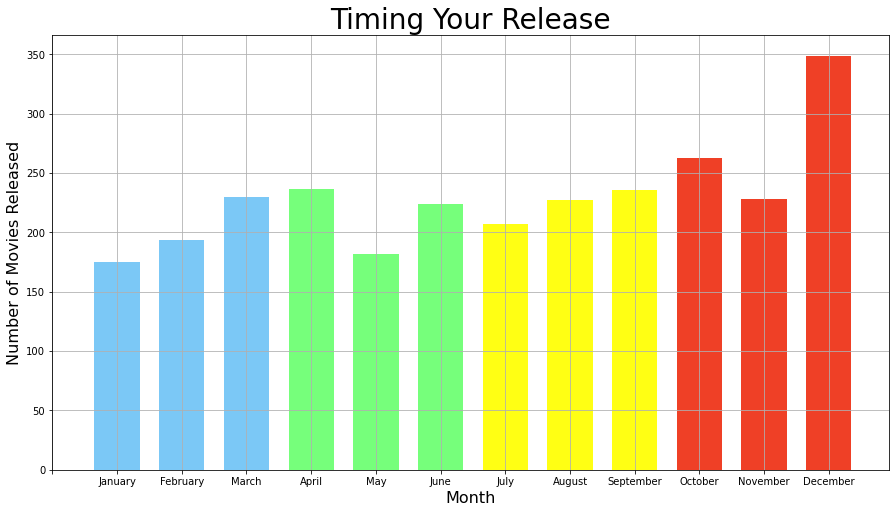

In [377]:
#plotting the figure
fig1 = plt.figure(figsize=(15, 8))
fig1 = plt.bar(x=list(Months_Sorted.keys()), height=list(Months_Sorted.values()), width= 0.7, color= [
    'xkcd:lightblue', 
    'xkcd:lightblue', 
    'xkcd:lightblue', 
    'xkcd:lightgreen', 
    'xkcd:lightgreen',
    'xkcd:lightgreen',
    'xkcd:yellow',
    'xkcd:yellow',
    'xkcd:yellow',
    'xkcd:tomato',
    'xkcd:tomato',
    'xkcd:tomato'])                                                                                          
plt.xlabel('Month', size=16)
plt.ylabel('Number of Movies Released', size=16)
plt.title('Timing Your Release', size=28)
plt.xticks(ticks=range(13), labels=['', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.grid()
plt.savefig('Movie_Releases_Per_Year')

As seen above, December is when most movies are released and January is when the least number of movies are released. Likewise, Q4 (as highlighted the red columns) has the most movies released in the year whereas Q1, as highlighted by the blue columns, has the least number of movie releases. 

In [353]:
# Removing $ and , from production_budget & worldwide_gross
df4['production_budget'] = df4.loc[:,'production_budget'].replace('$','').replace(',','')
df4['worldwide_gross'] = df4.loc[:,'worldwide_gross'].replace('$','').replace(',','')

df4['production_budget'] = df4['production_budget'].map(lambda x: x.replace('$','').replace(',',''))
df4['worldwide_gross'] = df4['worldwide_gross'].map(lambda x: x.replace('$','').replace(',',''))

# Reassigning the datatype for roduction_budget & worldwide_gross
df4['production_budget'] = df4.loc[:,'production_budget'].astype(int)
df4['worldwide_gross'] = df4.loc[:,'worldwide_gross'].astype(int)

<ipython-input-353-c925c562c9b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['production_budget'] = df4.loc[:,'production_budget'].replace('$','').replace(',','')
<ipython-input-353-c925c562c9b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['worldwide_gross'] = df4.loc[:,'worldwide_gross'].replace('$','').replace(',','')
<ipython-input-353-c925c562c9b0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [354]:
# Checking the datatypes of production_budget & worldwide_gross to make sure they're integers
print(df4['production_budget'].dtype)
print(df4['worldwide_gross'].dtype)

int64
int64


In [355]:
# Assessing the values in the production_budget column to make sure there are no nulls
df4['production_budget'].value_counts()

20000000     109
10000000     106
25000000      87
5000000       85
15000000      83
            ... 
24200000       1
97000000       1
187500000      1
2280000        1
67500000       1
Name: production_budget, Length: 319, dtype: int64

In [356]:
# Getting the minimum production budget
df4['production_budget'].min()

1400

In [357]:
# Getting the maximum production budget
df4['production_budget'].max()

425000000

In [358]:
# Assessing the values in the worldwide_gross column to make sure there are no nulls
df4['worldwide_gross'].value_counts()

0             266
5953886        10
44793168        8
385997896       8
51078541        6
             ... 
7445044         1
40650842        1
1234846267      1
40966716        1
835524642       1
Name: worldwide_gross, Length: 1945, dtype: int64

In [359]:
# Removing 0's from the worldwide_gross column & checking the shape of the dataframe
df4 = df4[df4['worldwide_gross'] != 0]
df4.shape

(2486, 7)

In [360]:
# Rechecking the dataframe
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2486 entries, 0 to 2873
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              2486 non-null   object 
 1   release_date       2486 non-null   int64  
 2   production_budget  2486 non-null   int64  
 3   worldwide_gross    2486 non-null   int64  
 4   genres             2486 non-null   object 
 5   runtime_minutes    2486 non-null   float64
 6   quarter            2486 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 155.4+ KB


In [361]:
# Calculating ROI & creating a new column
df5['ROI'] = df5.apply(lambda x: ((x.worldwide_gross - x.production_budget)/x.production_budget)*100, axis=1)

# Assessing the values in the new ROI column
df5['ROI'].value_counts()

-60.307427      18
 196.921458     15
 125.843689     15
 8858.633600    15
-76.943770      13
                ..
 68.095879       1
-48.031520       1
 15.630900       1
 4249.700800     1
 210.736060      1
Name: ROI, Length: 1944, dtype: int64

In [362]:
# Grouping the values of the ROI column by quarter
df5.groupby('quarter').mean()

,release_date,production_budget,worldwide_gross,runtime_minutes,ROI
quarter,,,,,
Q1,2.100781,4.096166e+07,1.184197e+08,104.010937,333.027648
Q2,4.967977,5.177107e+07,1.688909e+08,106.045852,341.590712
Q3,8.035245,3.515163e+07,1.013033e+08,103.259157,356.048902
Q4,11.022520,4.013165e+07,1.282280e+08,109.037127,351.240763


In [363]:
monthROI = df5.groupby('quarter').mean()

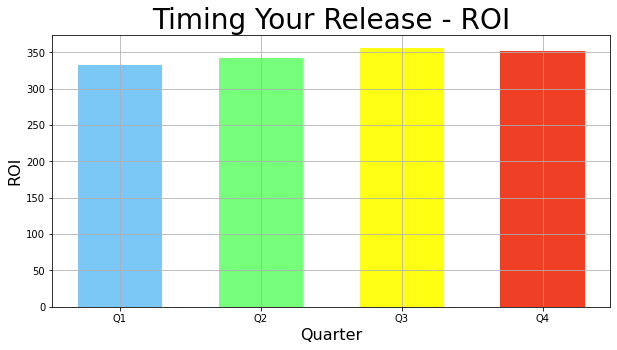

In [364]:
#plotting the figure
fig2 = plt.figure(figsize=(10, 5))
fig2 = plt.bar(monthROI.index, monthROI.ROI, width= 0.6, color= [
    'xkcd:lightblue',  
    'xkcd:lightgreen', 
    'xkcd:yellow',
    'xkcd:tomato'])                                                                 
plt.xlabel('Quarter', size=16)
plt.ylabel('ROI', size=16)
plt.title('Timing Your Release - ROI', size=28)
plt.grid()
plt.savefig('Movie_Releases_&_ROI')

The four quarters have similar ROIs. Quarter 1, highlighted in blue has the lowest ROI and quarter 3, highlighted in yellow has the highest ROI.

#### Second Analysis - Genres & ROI

The second analysis looks into genres along with analyzing production costs and worldwide revenues. Those two variables were used to determine the return on interest (ROI) each movie had. The movies were grouped by genre to determine which genre has the highest yielding ROI. 

In [365]:
# Checking current datatype of "genres" column
df5['genres'].dtype

dtype('O')

In [366]:
# Checking the first value in the genres column
df5['genres'].values[0]

['Action']

In [367]:
df5['genres'].head().values

array([list(['Action']), list(['Adventure']), list(['Fantasy']),
       list(['Biography']), list(['Drama'])], dtype=object)

In [368]:
df6 = df5.explode('genres')
df6.head()

,movie,release_date,production_budget,worldwide_gross,genres,runtime_minutes,quarter,ROI
0,The Legend of Hercules,1,70000000,58953319,Action,99.0,Q1,-15.780973
0,The Legend of Hercules,1,70000000,58953319,Adventure,99.0,Q1,-15.780973
0,The Legend of Hercules,1,70000000,58953319,Fantasy,99.0,Q1,-15.780973
1,The Hammer,3,850000,442638,Biography,108.0,Q1,-47.924941
1,The Hammer,3,850000,442638,Drama,108.0,Q1,-47.924941


In [369]:
# Calculating ROI & creating a new column
df6['ROI'] = df6.apply(lambda x: ((x.worldwide_gross - x.production_budget)/x.production_budget)*100, axis=1)

# Assessing the values in the new ROI column
df6['ROI'].value_counts()

-60.307427      18
 196.921458     15
 125.843689     15
 8858.633600    15
-76.943770      13
                ..
 68.095879       1
-48.031520       1
 15.630900       1
 4249.700800     1
 210.736060      1
Name: ROI, Length: 1944, dtype: int64

In [370]:
# Grouping the values of the ROI column by genres
df6.groupby('genres').mean().sort_values('ROI', ascending=False)

,release_date,production_budget,worldwide_gross,runtime_minutes,ROI
genres,,,,,
Horror,6.619048,2.117511e+07,7.819026e+07,95.673469,898.095555
Mystery,6.568528,2.366820e+07,7.867879e+07,102.842640,707.405812
Thriller,6.721963,3.099006e+07,9.428917e+07,103.474299,552.903819
Biography,7.877005,2.627967e+07,7.540644e+07,112.727273,411.647122
Sport,7.859649,2.578421e+07,8.457967e+07,110.263158,387.075365
Documentary,7.063218,2.478200e+07,6.582087e+07,80.609195,381.686989
Fantasy,6.239264,7.312815e+07,2.302004e+08,108.987730,363.704891
Family,7.314961,5.832118e+07,1.834023e+08,103.874016,359.631311
Animation,6.901639,9.001876e+07,3.347348e+08,93.491803,347.690553


In [371]:
top5ROI = df6.groupby('genres').mean().sort_values('ROI', ascending=False).head()

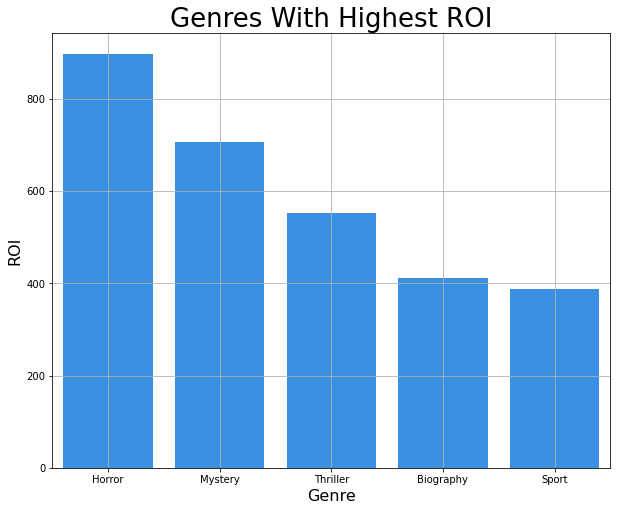

In [380]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10,8))

# Setting parameters to the plot
fig3 = sns.barplot(x=top5ROI.index, y=top5ROI.ROI, ax=ax, color="dodgerblue")
fig3.set_xlabel('Genre', size=16)
fig3.set_ylabel('ROI', size=16)
fig3.set_title('Genres With Highest ROI', size=26)
fig3.grid()
plt.savefig('Genres With the Highest ROI')

As seen above, horror movies have the highest ROI, followed by mystery and then thriller. 

#### Third Analysis - Runtime and Average Rating

A third analysis was conducted on movie runtimes. The runtimes were first assessed and then anything less then 1 hour was dropped to get a more inconclusive population. The purpose of this analysis is to determine the ideal runtime of a movie.

In [381]:
# Getting the minimum and maximum from the Runtime column
print(df6['runtime_minutes'].min())
print(df6['runtime_minutes'].max())
print(df6['runtime_minutes'].mean())

nan
nan
nan


In [382]:
# Dropping runtime minute values less than 1 hour
df6 = df6.drop((df6['runtime_minutes'] >= 60.0).index)
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              0 non-null      object 
 1   release_date       0 non-null      int64  
 2   production_budget  0 non-null      int64  
 3   worldwide_gross    0 non-null      int64  
 4   genres             0 non-null      object 
 5   runtime_minutes    0 non-null      float64
 6   quarter            0 non-null      object 
 7   ROI                0 non-null      float64
dtypes: float64(2), int64(3), object(3)
memory usage: 80.0+ bytes


In [375]:
# Creating a new column which will put the runtimes in buckets
df6.loc[(df6['runtime_minutes'] <= 90.0) & (df6['runtime_minutes'] >= 60.0), 'RTM Bucket'] = 'Between 1 hour and 1.5 hours' # RTM shortened for runtime_minutes
df6.loc[(df6['runtime_minutes'] <= 120.0) & (df6['runtime_minutes'] >= 91.0), 'RTM Bucket'] = 'Between 1.5 hours and 2 hours'
df6.loc[(df6['runtime_minutes'] <= 150.0) & (df6['runtime_minutes'] >= 121.0), 'RTM Bucket'] = 'Between 2 hours and 2.5 hours'
df6.loc[(df6['runtime_minutes'] <= 180.0) & (df6['runtime_minutes'] >= 151.0), 'RTM Bucket'] = 'Between 2.5 hours and 3 hours'
df6.loc[(df6['runtime_minutes'] < 180.0), 'RTM Bucket'] = 'Greater than 3 hours'
df6['RTM Bucket'].value_counts()

ValueError: cannot set a frame with no defined index and a scalar

In [ ]:
# Plotting the RTM Bucket column
fig3 = df6['RTM Bucket'].value_counts().plot(kind='barh')
fig3 = plt.xlabel('Number of Movies', size=14)
fig3 = plt.ylabel('Runtime Category', size=14)
fig3 = plt.title("Popular Runtimes", size=24)
plt.savefig('Movie Runtimes')

By a landslide, the most popular movie runtime is between one-and-a-half hours to two hours. A runtime between an hour and an hour-and-a-half had simialr results to movies that run between two hours and two-and-a-half hours. The least popular runtime was two-and-a-half hours to three hours. 

### Conclusion

This analysis has analyzed three seperate factors for Microsoft. Some conclusions are the best time in a year to release a movie, the movie genres that are the most popular and the ideal runtime for a movie. 

The best time to release a movie is in quarter 2, which falls into the months of April, May and June. Quarter 2 has the second lowest average number of movies being released. It would not be ideal to release a movie in quarter 4, which has the highest number of movie releases. As Microsoft is new to the industry, there is a chance their movie will not get as many views given that everyone is watching other movies. Quarter 1 has the lowest number of releases however the cold weather needs to be taken into account. With releasing a movie in April, May or June, everyone will want to be outside as the weather is getting warmer, this setting Microsoft up to get the most views. 

A second analysis was done on movie genres and which ones would generate the highest ROI. The top three categories were horror, mystery and thriller consecutively. Any of these three genre categories would be great starters for Microsoft.

A third anaylsis was completed on movie runtimes. This was done to get an industry benchmark to determine how long the movie should be. It was found that most movies run between 90 to 120 minutes. This runtime would put Microsoft in a good place to get the most number of views possible. 